# Ford GoBike System Data Exploration

## Table of Contents
<ul>
    
<li><a href="#intro">Introduction</a></li>
    <ul>
    <li><a href="#import">Importing</a></li> 
    <li><a href="#sett">Settings</a></li>    
    </ul>
    
<li><a href="#view">Viewing</a></li>
    
<li><a href="#wrangle">Wrangling</a></li>
    <ul>
    <li><a href="#assess">Assessing</a></li> 
    <li><a href="#clean">Cleaning</a></li>    
    </ul>
    
<li><a href="#feature">Features Engineering</a></li>
    
<li><a href="#uni_exp">Univariate Exploration</a></li>
 
<li><a href="#bi_exp">bivariate Exploration</a></li>

<li><a href="#multi_exp">Multivariate Exploration</a></li>

<li><a href="#store">Storing</a></li>

<li><a href="#concl">Conclusions</a></li>
    
</ul>




<a id="intro"></a>
## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greaterSan Francisco Bay area.

<a id="import"></a>
### Importing

In [1]:
# importing all packages and setting plots to be embedded inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import haversine as hs

%matplotlib inline

<a id="sett"></a>
### Settings

In [2]:
#pd.set_option('display.max_columns', None) 
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_columns', 'display.max_rows')

In [3]:
DATASET_YEAR = 2019

<a id="view"></a>
## Viewing

In [4]:
# loading the data
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [5]:
# viewing the data
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
print(bike_df.shape)
print(bike_df.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


### What is the structure of your dataset?

> The dataset contains 183,412 observatons with total 16 columns. It has numerical, categorical, time, and location data.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest are those that have an effect on the duration and distance of the trip.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The location data (latitdue and longitude) of the start and end stations as well as other characteristics of the user, such as: user_type, member_birth_year, member_gender.

<a id="wrangle"></a>
## Wrangling

<a id="assess"></a>
### Assessing

In [7]:
# check no. rows, columns, missing, and columns types
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### Remarks
> Data seems ok. Requires some handling for missing values, wrong types and column name modification (start_time, end_time)

In [8]:
# percentages of null in each column
100 * bike_df.isnull().sum() / bike_df.shape[0]

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64

In [9]:
# percentages of at least one null in any value of a row
100 * bike_df.isnull().any(axis=1).sum() / bike_df.shape[0]

4.612566244302445

#### Remarks
> - Percentages of missing valuess in each column are not high (highest is < 5%) which means there won't be any bias in data if we impute the missing values
> - Also, percentage of rows that have at least 1 missing value is < 5%. Therefore, they can be deleted without affecting the data.

In [10]:
# check for full observation duplicates
bike_df.duplicated().sum()

0

In [11]:
# check for invalid duplicate where same bike is used at the same start time 
bike_df.duplicated(['bike_id', 'start_time']).sum()

0

In [12]:
# check for invalid duplicate where same bike is used at the same end time 
bike_df.duplicated(['bike_id', 'end_time']).sum()

0

#### Remarks
> Data doesn't contain any duplicates

In [13]:
# check numerical values
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### Remarks
> Values seem normal except for the minimum value of member_birth_year which is 1878.<br>
> According to Guinness World Records, "The greatest fully authenticated age to which any human has ever lived is 122 years 164 days".<br> As the dataset year is 2019 > 2019 - 122 = 1897. Therefore, any member_birth_year that is less than this threshold (1897) will be considered as a typo.

In [14]:
bike_df.member_birth_year.value_counts().reset_index().rename(columns={'index': 'member_birth_year', 'member_birth_year':'count'})\
.sort_values(by='member_birth_year')

,member_birth_year,count
71,1878.0,1
55,1900.0,53
65,1901.0,6
63,1902.0,11
73,1910.0,1
...,...,...
18,1997.0,3481
19,1998.0,3208
23,1999.0,2528
30,2000.0,1678


#### Remarks
> It seems that only one value is less than the defined threshold

In [15]:
# check categorical values (user_type)
bike_df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [16]:
# check categorical values (member_gender)
bike_df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [17]:
# check categorical values (start_station_id)
bike_df.start_station_id.value_counts()

58.0     3904
67.0     3544
81.0     3052
21.0     2895
3.0      2760
         ... 
301.0       9
51.0        7
300.0       4
224.0       4
344.0       2
Name: start_station_id, Length: 329, dtype: int64

In [18]:
# check categorical values (end_station_id)
bike_df.end_station_id.value_counts()

67.0     4857
58.0     3973
21.0     3647
15.0     3368
3.0      2997
         ... 
51.0        9
300.0       7
344.0       6
224.0       6
301.0       5
Name: end_station_id, Length: 329, dtype: int64

In [19]:
# check categorical values (bike_id)
bike_df.bike_id.value_counts()

4794    191
4814    176
5014    174
4422    174
5175    173
       ... 
2297      1
2258      1
2415      1
1397      1
5067      1
Name: bike_id, Length: 4646, dtype: int64

#### Quality Issues
1. Missing values in: start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender<br><br>
2. Wrong type of: start_time, end_time, start_station_id, end_station_id, bike_id, member_birth_year<br><br>
3. Inaccurate values of: member_birth_year (min possible value is 1897 years), only one value is less than that (1878)<br><br>
4. Column name of: start_time and end_time need some modification to be more precise of the values

#### Tidines Issues
No tidiness issues

<a id="clean"></a>
### Cleaning

In [20]:
# Creating copy of the data
bike_df_copy = bike_df.copy()

#### Quality Issue 1.
Missing values in: start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender

#### Define
Drop all records that has any missing value since we have a lot of data and percentage of missing is less than 5%

#### Code

In [21]:
bike_df_copy.dropna(axis=0, inplace=True)

#### Test

In [22]:
bike_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

#### Quality Issue 2.
Wrong type of: start_time, end_time, start_station_id, end_station_id, bike_id, member_birth_year

#### Define
Convert:
- time from object to datetime<br>
- id: from int/float to object<br>
- birth_year from float to int<br>

#### Code

In [23]:
def apply_typ_to_col(df, typ_col_dic):
    '''
    Modify the types of dataframe columns from the type and column pairs of the dictionary
    
        Parameters:
            df (dataframe): its columns will be modifed based on the type and column dictionary
            typ_col_dic (dictionary): contains the type-column pairs where type is a singel value, column is a list
            
        Returns:
            df (dataframe): the modifed dataframe
    '''
    for typ, col_list in typ_col_dic.items():  
        for col in col_list:
            df[col] = df[col].astype(typ)
    return df


typ_col_dic = {'datetime64':['start_time', 'end_time'],
               'int64':['start_station_id', 'end_station_id', 'member_birth_year'],
               'object':['start_station_id', 'end_station_id', 'bike_id']}
bike_df_copy = apply_typ_to_col(bike_df_copy, typ_col_dic)

#### Test

In [24]:
bike_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

#### Quality Issue 3.
Inaccurate values of: member_birth_year (min possible value is 1897 years), only one value is less than that (1878)

#### Define
correct the value from 1878 to 1978

#### Code

In [25]:
val_indx = bike_df_copy.loc[bike_df_copy.member_birth_year == 1878, 'member_birth_year'].index
bike_df_copy.loc[bike_df_copy.member_birth_year == 1878, 'member_birth_year'] = 1978

#### Test

In [26]:
bike_df_copy.iloc[val_indx]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
28429,343,2019-02-25 08:43:48.832,2019-02-25 08:49:31.849,22,Howard St at Beale St,37.789756,-122.394643,349,Howard St at Mary St,37.78101,-122.405666,5065,Subscriber,1987,Male,No


#### Quality Issue 4.
Column name of: start_time and end_time need some modification to be more precise of the values

#### Define
change column name of start_time and end_time to start_date_time and end_date_time

#### Code

In [27]:
bike_df_copy.rename(columns = {'start_time': 'start_date_time', 'end_time':'end_date_time'}, inplace=True)

#### Test

In [28]:
bike_df_copy.columns.tolist()

['duration_sec',
 'start_date_time',
 'end_date_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']

In [29]:
# stroing the cleaned dataset
bike_df_cleaned = bike_df_copy.copy()

<a id="feature"></a>
## Features Engineering
- Creating age column
- Creating distance column
- Seperating date_time columns to two columns
- Creating day_diff and time_diff columns

#### Creating age column

In [30]:
bike_df_cleaned['age'] = DATASET_YEAR - bike_df_cleaned.member_birth_year

#### Creating distance column

In [31]:
# calculating distance between the start and end location in meters
# Since Euclidean Distance works for the flat surface like a Cartesian plain and Earth is not flat, so Haversine Distance
# will be used. Haversine Distance is the angular distance between two locations on the Earth’s surface.
def apply_calculate_distance(df):
    p1 = (df[0], df[1])
    p2 = (df[2], df[3])
    distance = hs.haversine(p1, p2, unit=hs.Unit.METERS)
    return distance

points_cols = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
bike_df_cleaned['distance_m'] = bike_df_cleaned[points_cols].apply(apply_calculate_distance, axis=1)

#### Seperating date_time columns to two columns 

In [32]:
def seperate_date_time(df, col_list):
    '''
    Seperate date and time components into two columns for each columns with type datetime64 in the list provided,
    if the list is empty, then get all datetime64 column types from the dataframe and seperate them.
    
        Parameters:
            df (dataframe): a pair of date/time columns will be created for each column with type datetime64
            col_list (list): a list of required columns of type datetime64 to be used to create seperate date/time columns
            
        Returns:
            df (dataframe): the modifed dataframe
    '''
    if not col_list:
        col_list = df.select_dtypes(include=['datetime64']).columns.tolist()
    
    for i, col in enumerate(col_list):
        if df[col].dtype.type == np.datetime64:
            count = str(i+1)
            date_col = 'date' + count
            time_col = 'time' + count
            df[date_col] = pd.to_datetime(df[col].dt.date)
            df[time_col] = pd.to_timedelta(pd.to_datetime(((df[col].dt.time).astype(str))).dt.strftime('%H:%M:%S'))
    return df

col_list = ['start_date_time', 'end_date_time']
bike_df_cleaned = seperate_date_time(bike_df_cleaned, col_list)

In [33]:
bike_df_cleaned.rename(columns={'date1':'start_date',
                                'time1':'start_time',
                                'date2':'end_date',
                                'time2':'end_time'}, inplace=True)

#### Creating day_difference and time_difference columns

In [34]:
bike_df_cleaned['day_diff'] = bike_df_cleaned.end_date - bike_df_cleaned.start_date
bike_df_cleaned['time_diff'] = bike_df_cleaned.end_time - bike_df_cleaned.start_time

In [35]:
bike_df_cleaned.head()

,duration_sec,start_date_time,end_date_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,age,distance_m,start_date,start_time,end_date,end_time,day_diff,time_diff
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,Male,No,35,544.709256,2019-02-28,0 days 17:32:10,2019-03-01,0 days 08:01:55,1 days,-1 days +14:29:45
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,47,2704.548867,2019-02-28,0 days 12:13:13,2019-03-01,0 days 05:24:08,1 days,-1 days +17:10:55
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,Other,No,30,260.738904,2019-02-28,0 days 17:54:26,2019-03-01,0 days 04:02:36,1 days,-1 days +10:08:10
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,Male,Yes,45,2409.304744,2019-02-28,0 days 23:54:18,2019-03-01,0 days 00:20:44,1 days,-1 days +00:26:26
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,Male,No,60,3332.207230,2019-02-28,0 days 23:49:58,2019-03-01,0 days 00:19:51,1 days,-1 days +00:29:53


In [36]:
bike_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   duration_sec             174952 non-null  int64          
 1   start_date_time          174952 non-null  datetime64[ns] 
 2   end_date_time            174952 non-null  datetime64[ns] 
 3   start_station_id         174952 non-null  object         
 4   start_station_name       174952 non-null  object         
 5   start_station_latitude   174952 non-null  float64        
 6   start_station_longitude  174952 non-null  float64        
 7   end_station_id           174952 non-null  object         
 8   end_station_name         174952 non-null  object         
 9   end_station_latitude     174952 non-null  float64        
 10  end_station_longitude    174952 non-null  float64        
 11  bike_id                  174952 non-null  object         
 12  us

<a id="uni_exp"></a>
## Univariate Exploration

### Question : What is the distribution of duration_sec ?

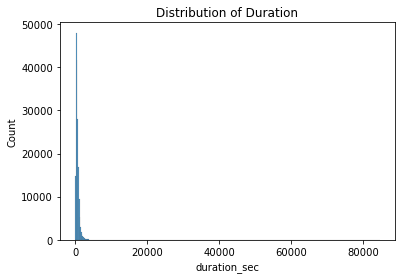

In [37]:
# plotting the histogram with the basic scale
binsize = 200
bins = np.arange(0, bike_df_cleaned.duration_sec.max()+binsize, binsize)
sns.histplot(data=bike_df_cleaned, x='duration_sec', bins=bins)
plt.title('Distribution of Duration');

In [38]:
# since the data has very larg values implied by the the x-axis, let's look at the statistics
bike_df_cleaned.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

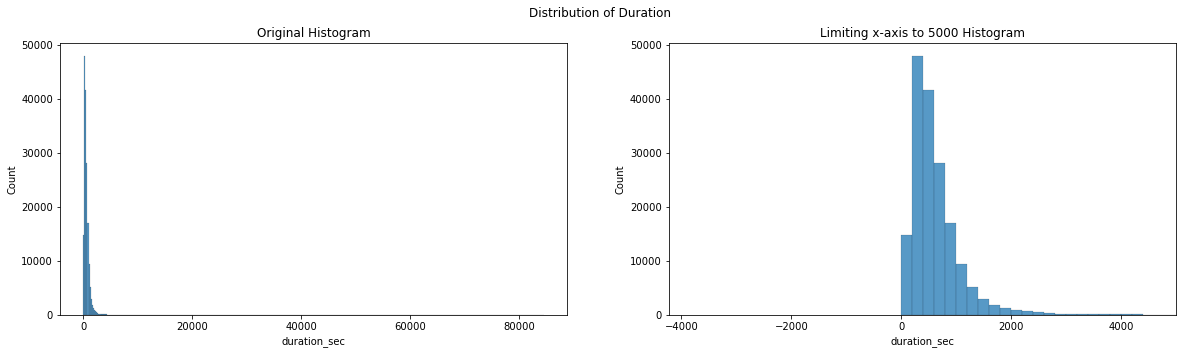

In [39]:
# from the statistics, most values (75%) are less than 800 while there is a maximum of 84,548 which greatley skewed the plot.
# we will plot two histograms, one with the original and second with limiting the x-axis.
plt.figure(figsize=[20,5])

binsize = 200
bins = np.arange(0, bike_df_cleaned.duration_sec.max()+binsize, binsize)

plt.suptitle('Distribution of Duration')

plt.subplot(1, 2, 1)
sns.histplot(data=bike_df_cleaned, x='duration_sec', bins=bins)
plt.title('Original Histogram')

plt.subplot(1, 2, 2)
sns.histplot(data=bike_df_cleaned, x='duration_sec', bins=bins)
plt.xlim(right=5000)
plt.title('Limiting x-axis to 5000 Histogram');

In [40]:
# now we have a clearer view of the distribution.
# the shape is right-skewed, however, the right tail is long. So, we will apply some log scaling.
# first, we will look at the log values of the data
np.log10(bike_df_cleaned['duration_sec'].describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

C:\Users\Zer0\anaconda3\envs\pyth_3.7\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
C:\Users\Zer0\anaconda3\envs\pyth_3.7\lib\site-packages\ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


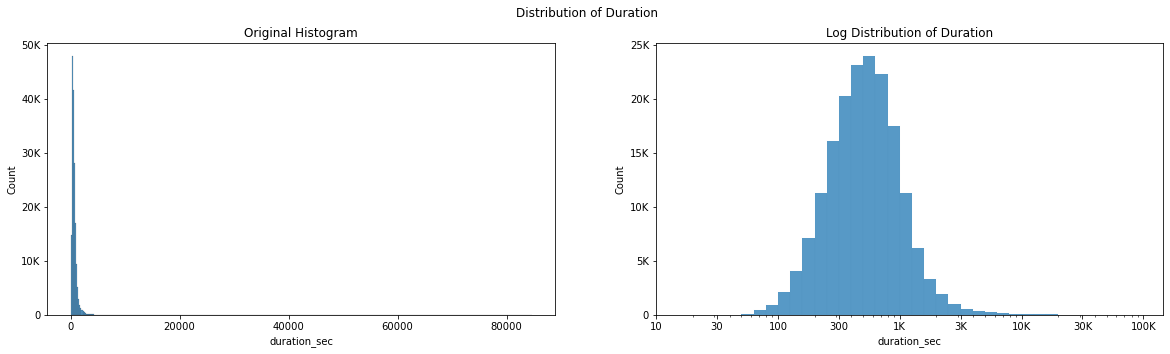

In [41]:
# creating the bins and plotting the histogram
plt.figure(figsize=[20,5])

binsize = 200
bins = np.arange(0, bike_df_cleaned.duration_sec.max()+binsize, binsize)

log_binsize = 0.1
log_bins = 10 ** np.arange(1.7, 5+log_binsize, log_binsize)
log_ticks = [10**1, 10**1.5, 10**2, 10**2.5, 10**3, 10**3.5, 10**4, 10**4.5, 10**5]
log_labels = ['10', '30', '100', '300', '1K', '3K', '10K', '30K', '100K']

plt.suptitle('Distribution of Duration')

plt.subplot(1, 2, 1)
ax1 = sns.histplot(data=bike_df_cleaned, x='duration_sec', bins=bins)
ax1.set_yticklabels(['0', '10K', '20K', '30K', '40K', '50K'])
plt.title('Original Histogram')

plt.subplot(1, 2, 2)
ax2 = sns.histplot(data=bike_df_cleaned, x='duration_sec', bins=log_bins)
plt.xscale('log')
plt.xticks(log_ticks, log_labels)
ax2.set_yticklabels(['0', '5K', '10K', '15K', '20K', '25K'])
plt.title('Log Distribution of Duration');

### Observations
> Duration shape is right-skewed which has a very long right tail as seen in the original histogram with lots of trips of short duration (lower end) and few of long duration (higher end) which most probably are outliers. However, when plotted in the log-scale, the shape takes a normal distribution showing that most trips duration falls between 100 and 3,000 seconds and the most occuring trip duration is between 300 and 1,000 seconds.

### Question : How extreme are the outliers in duration_sec ?

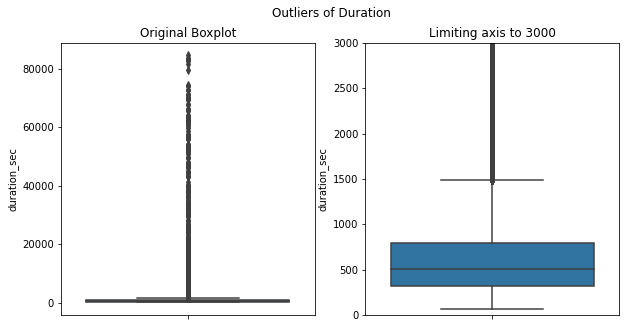

In [42]:
# we will be plotting boxplot to investigate outliers in the data
plt.figure(figsize=[10,5])

plt.suptitle('Outliers of Duration')

plt.subplot(1,2,1)
sns.boxplot(data=bike_df_cleaned, y='duration_sec')
plt.title('Original Boxplot')

plt.subplot(1,2,2)
sns.boxplot(data=bike_df_cleaned, y='duration_sec')
plt.ylim(bottom=0, top=3000)
plt.title('Limiting axis to 3000');

### Observations
> As we have concluded from the histogram distrubtion, the Duration has a lot of outliers. By limiting the axis, we have a clearer view of them. From the boxplot, we can see that values that are greater than 1500 seconds are outliers and the median seems to be around 500 seconds.

### Question: What is the distribution of the distance_m ?

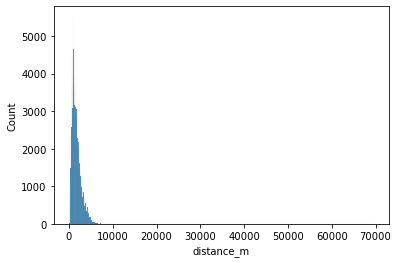

In [43]:
# plotting with basic scale
binsize = 500
bins = np.arange(0, bike_df_cleaned.distance_m.max()+binsize, binsize)
sns.histplot(data=bike_df_cleaned, x='distance_m');

In [44]:
# looks like there is a very long right tail, let's look at the statistics
bike_df_cleaned.distance_m.describe()

count    174952.000000
mean       1690.051442
std        1096.958237
min           0.000000
25%         910.444462
50%        1429.831313
75%        2224.012981
max       69469.336637
Name: distance_m, dtype: float64

In [45]:
# now, we will plot the histogram with log scale to overcome the very long right tail
# since distance_m has min value of 0, we will add 1 to each value before applying log
np.log10(bike_df_cleaned.distance_m.describe()+1)

count    5.242921
mean     3.228157
std      3.040586
min      0.000000
25%      2.959730
50%      3.155588
75%      3.347333
max      4.841799
Name: distance_m, dtype: float64

C:\Users\Zer0\anaconda3\envs\pyth_3.7\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\Zer0\anaconda3\envs\pyth_3.7\lib\site-packages\ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


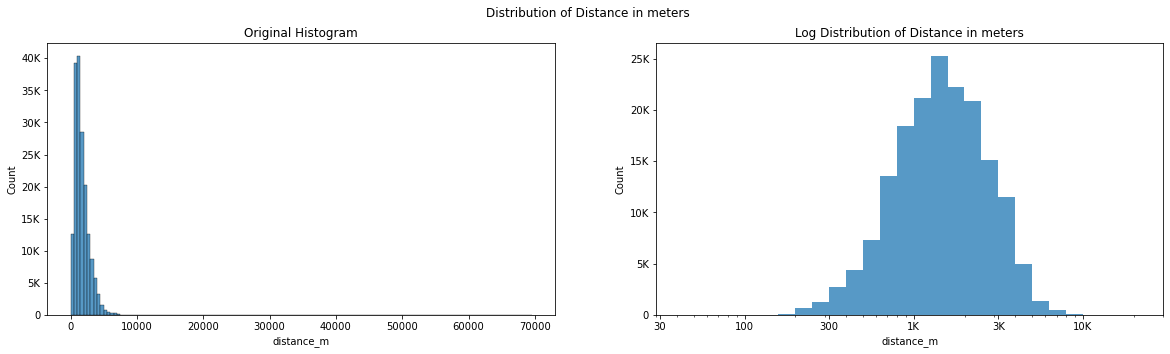

In [46]:
# creating the bins and plotting the histogram
plt.figure(figsize=[20,5])

binsize = 500
bins = np.arange(0, bike_df_cleaned.distance_m.max()+binsize, binsize)

log_binsize = 0.1
log_bins = 10 ** np.arange(0, 5+log_binsize, log_binsize)
log_ticks = [10**0, 10**0.5, 10**1, 10**1.5, 10**2, 10**2.5, 10**3, 10**3.5, 10**4, 10**4.5, 10**5]
log_labels = ['1', '3', '10', '30', '100', '300', '1K', '3K', '10K', '30K', '100K']

plt.suptitle('Distribution of Distance in meters')

plt.subplot(1, 2, 1)
ax1 = sns.histplot(data=bike_df_cleaned, x='distance_m', bins=bins)
y_ticks = ['0', '5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K']
ax1.set_yticklabels(y_ticks)
plt.title('Original Histogram')

plt.subplot(1, 2, 2)
ax2 = sns.histplot(data=bike_df_cleaned, x='distance_m', bins=log_bins)
plt.xscale('log')
plt.xticks(log_ticks, log_labels)
y_ticks = ['0', '5K', '10K', '15K', '20K', '25K']
ax2.set_yticklabels(y_ticks)
plt.xlim(left=30, right=30000)
plt.title('Log Distribution of Distance in meters');

### Observations
> Distance shape is right-skewed which has a very long right tail as seen in the original histogram with lots of trips of short distances (lower end) and few of larg distances (higher end) which most probably are outliers. However, when plotted in the log-scale, the shape takes a normal distribution showing that most trips distance falls between 300 and 10,000 meters and the most occuring trip distance is between 1,000 and 3,000 meters.

### Question : How extreme are the outliers in distance_m?

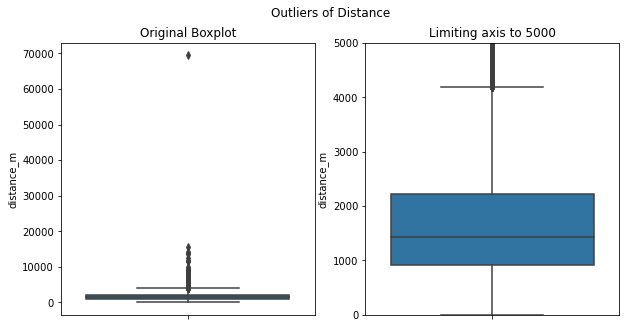

In [47]:
# we will be plotting boxplot to investigate outliers in the data
plt.figure(figsize=[10,5])

plt.suptitle('Outliers of Distance')

plt.subplot(1,2,1)
sns.boxplot(data=bike_df_cleaned, y='distance_m')
plt.title('Original Boxplot')

plt.subplot(1,2,2)
sns.boxplot(data=bike_df_cleaned, y='distance_m')
plt.ylim(bottom=0, top=5000)
plt.title('Limiting axis to 5000');

### Observations
> As we have concluded from the histogram distrubtion, the Distance has a lot of outliers same as duration. By limiting the axis, we have a clearer view of them. From the boxplot, we can see that values that are greater than almost 4500 meters are outliers and the median seems to be around 500 meters.

### Question: How the different user_type groups are distributed ? 

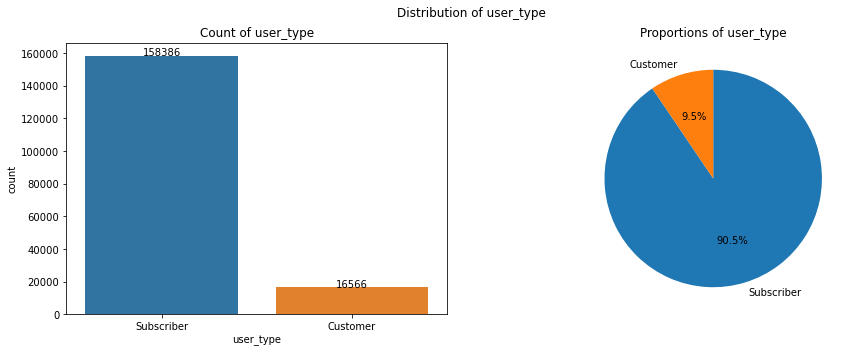

In [48]:
def plot_bar_bie(df, col, subplot_rows=1, subplot_cols=2, figsize=[15,5]): 
    '''
    Plot bar chart that represents absolute frequencey, and pie chart that represents relative frequency
    
        Parameters:
            df (dataframe): the dataframe that has the data
            col (string): string that represents the column name to be plotted
            subplot_rows(int): int of number of rows for the subplot function
            subplot_cols(int): int of number of cols for the subplot function
            figsize(list): list that contains width and height of the figure
        Returns:
            None
    '''
    # prepare data summary 
    col_counts = df[col].value_counts()
    col_order = col_counts.index
    col_total = col_counts.sum()
    col_props = col_counts / col_total
    col_props_df = col_props.reset_index().rename(columns={col:'propotion', 'index':col})

    plt.figure(figsize=figsize)
    plt.suptitle('Distribution of {}'.format(col))

    # plot the bar chart
    plt.subplot(subplot_rows, subplot_cols, 1)
    sns.countplot(data=df, x=col, order=col_order)
    # print count text on the bars
    for i in range (col_counts.shape[0]):
        count = col_counts[i]
        count_string = str(count)
        plt.text(i, count+1, count_string, ha='center', fontsize=10)
    plt.title('Count of {}'.format(col))

    # plot the pie chart
    plt.subplot(subplot_rows, subplot_cols, 2)
    plt.pie(data=col_props_df, x='propotion', labels=col_order, startangle = 90, counterclock = False, autopct='%1.1f%%')
    plt.title('Proportions of {}'.format(col));
        
plot_bar_bie(bike_df_cleaned, 'user_type')        

### Observations
> There seems to be 158,386 users who are subscribers to the service which represents 90.5% of all users compared to 16,566 users who are customers which represents only 9.5%. This great unbalance will not be usefull as a factor to determine the effect of user_type on trip duration and trip distance.

### Question: What member_gender is most dominant ?

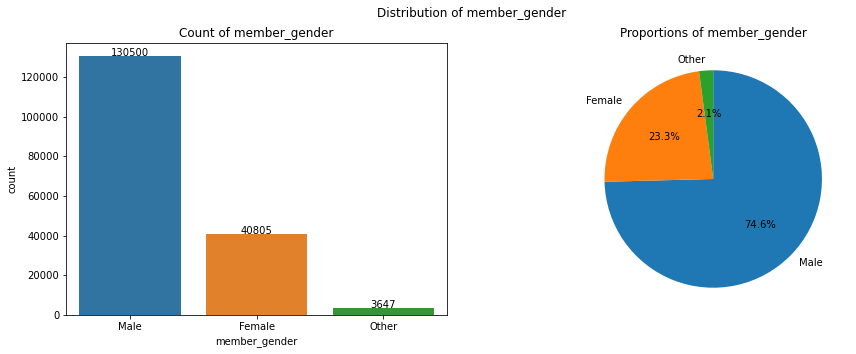

In [49]:
plot_bar_bie(bike_df_cleaned, 'member_gender')        

### Observations
> From the charts, we can see that most users are males with 130,500 count, 40,805 users are females, and 3,647 users didn't specify their gender, representing 74.6%, 23.3%, and 2.1% of all users, respectivily. Again, we have class inbalance and that could cause inaccurate evaluation of the effect of member_gender on trip duration and trip distance.

### Question: How many users are going with bike_share_for_all_trip service ?

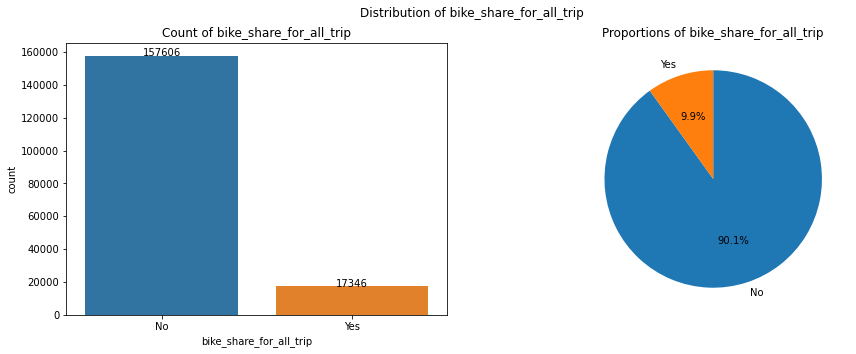

In [50]:
plot_bar_bie(bike_df_cleaned, 'bike_share_for_all_trip')        

### Observations
> It seems that the majority of users are not going with the service. Only 9.9% are, while 90.1% are going with the regular private bike trips. This also shows great class inbalance towards 'No' class.

### Question : How is member_birth_year distributed ?

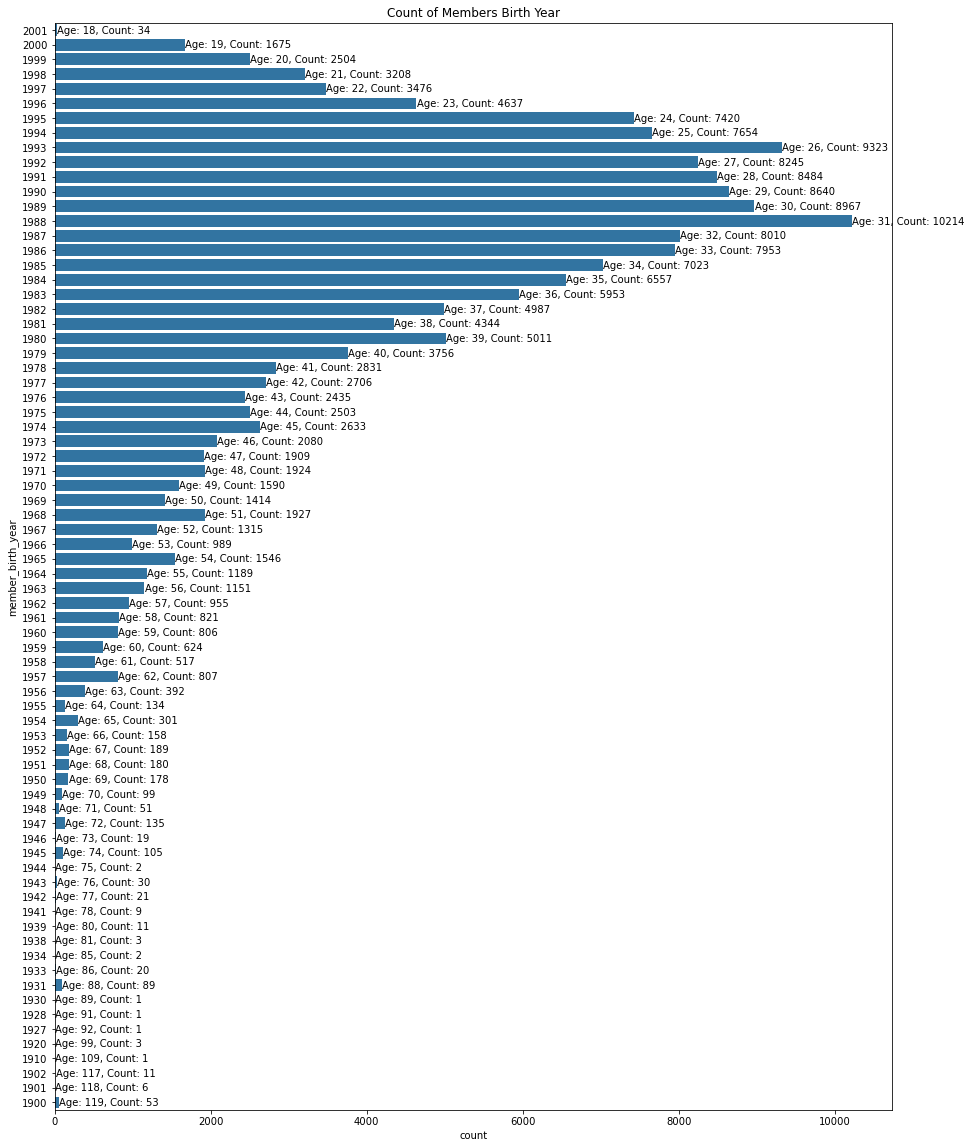

In [51]:
# prepare summary data of member_birth_year to be used in barplot
birth_counts = bike_df_cleaned.member_birth_year.value_counts().sort_index(ascending=False)
birth_order = birth_counts.index
birth_counts_df = birth_counts.reset_index().rename(columns={'member_birth_year':'count', 'index':'member_birth_year'})

plt.figure(figsize=[15,20])

base_color = sns.color_palette()[0]
sns.barplot(data=birth_counts_df, y='member_birth_year', x='count', order=birth_order, orient='h', color=base_color)
# print count text on the bars
for i in range (birth_counts.shape[0]):
    count = birth_counts_df['count'].iloc[i]
    birth_year = birth_counts_df['member_birth_year'].iloc[i]
    age = DATASET_YEAR - birth_year
    
    text = 'Age: {}, Count: {}'.format(str(age), str(count))
    plt.text(count+1, i, text, va='center', fontsize=10)
    
plt.title('Count of Members Birth Year');

### Observations
> We can see from the bar chart that most users are with birth year 1988 and 1993, with ages 31 and 26, respectively. In general, users interval with highest frequency is between 1985 and 1995, ages: 24 and 34.  However, more interestingly is that there are users who are above 100 of age! Thier distribution is as follows: 1 user of age 109, 11 users of age 117, 6 users of age 118, and 53 users of age 119! 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration_sec variable had very large values, however most values were small so that greatly skewed the data. I had to use log scale in order to get clearer view and understand the underlying distribtuion better. This is also true for the distance_m variable. Both showed normal ditribution after log-scaling.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data was tidy, so I havn't done any operations on the data. Only axis trnasformations. However, I performed some feature engineering to come up with some new fields to help in exploration such as, date and distance columns. Also, I removed any rows that had null values since they represented less than 5% only.

<a id="bi_exp"></a>
## Bivariate Exploration

### Quesion: How is the relationship between duration_sec and distance_m ?

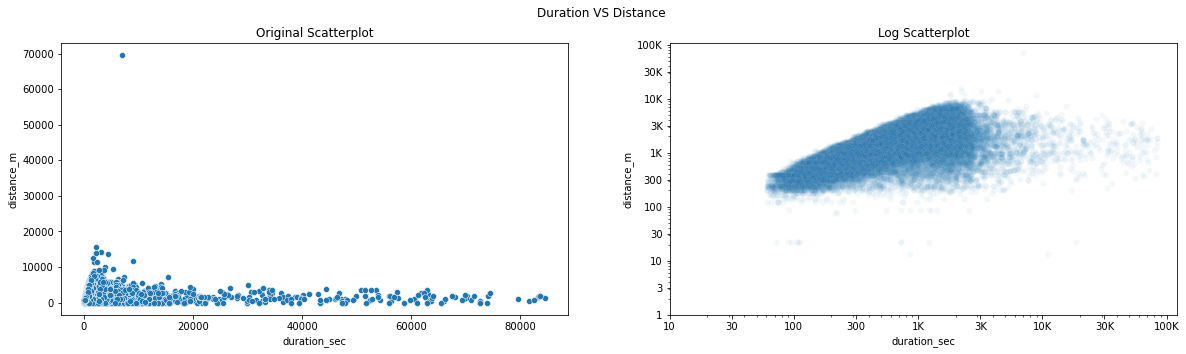

In [52]:

plt.figure(figsize=[20,5])

plt.suptitle('Duration VS Distance')

plt.subplot(1,2,1)
sns.scatterplot(data=bike_df_cleaned, x='duration_sec', y='distance_m')
plt.title('Original Scatterplot')

plt.subplot(1,2,2)
sns.scatterplot(data=bike_df_cleaned, x='duration_sec', y='distance_m', x_jitter=0.3, alpha=1/20)

plt.xscale('log')
plt.xticks([10**1, 10**1.5, 10**2, 10**2.5, 10**3, 10**3.5, 10**4, 10**4.5, 10**5],
           ['10', '30', '100', '300', '1K', '3K', '10K', '30K', '100K'])

plt.yscale('log')
plt.yticks([10**0, 10**0.5, 10**1, 10**1.5, 10**2, 10**2.5, 10**3, 10**3.5, 10**4, 10**4.5, 10**5],
           ['1', '3', '10', '30', '100', '300', '1K', '3K', '10K', '30K', '100K'])

plt.title('Log Scatterplot');

### Observations
> The original plot doesn't provide much information about the relationship, and there seems to be an outlier distance value of 70,000 meters. However, the log-scaled scatterplot on the right shows that there is a positive linear relationship between duration and distance specifically in the interval that has the most occurances of all observations which is in distance between 300 and 10,000 meters and duration between 100 and 3,000 seconds.

### Question: What is the average duration and distance for each user type ?

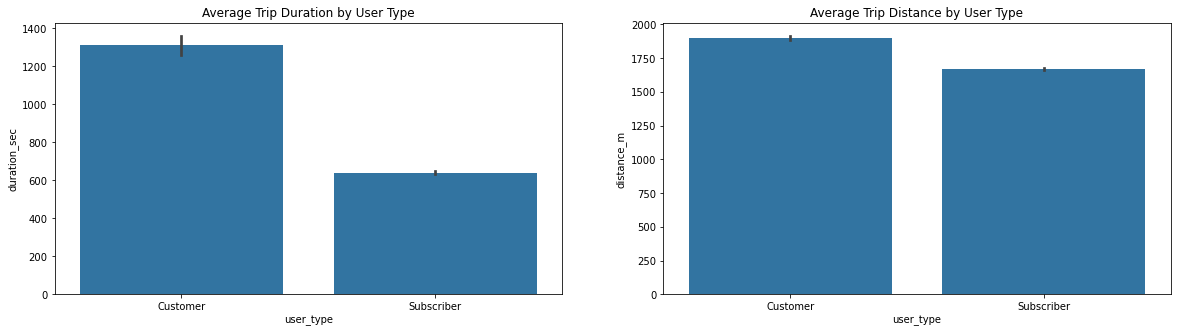

In [53]:
base_color = sns.color_palette()[0]

plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
sns.barplot(data=bike_df_cleaned, x='user_type', y='duration_sec', color=base_color)
plt.title('Average Trip Duration by User Type');

plt.subplot(1,2,2)
sns.barplot(data=bike_df_cleaned, x='user_type', y='distance_m', color=base_color)
plt.title('Average Trip Distance by User Type');

### Observation
> The avergae trip duration for users who are customers is more than 1200s which is twice as much as that of the subscribers (600s). Similarly, the average trip distance in higher for customer. Logically, it should be the opposite. However, this could be duo to different factors such as age, gender or bike share service which we will look at next.

### Question: What is the composition of user type in terms of gender, bike share service, and age ?

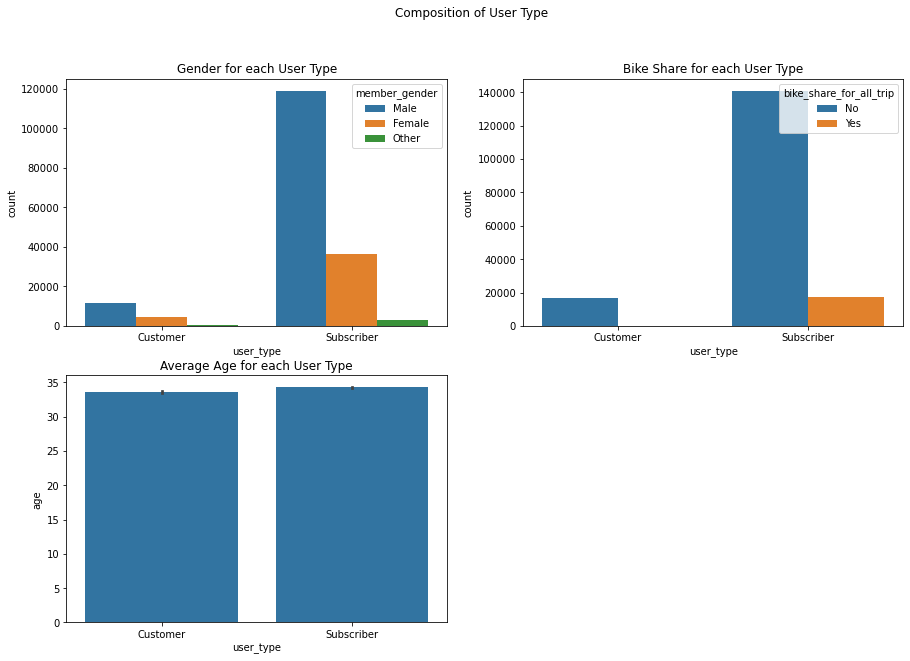

In [54]:
gender_count = bike_df_cleaned.member_gender.value_counts()
gender_order = gender_count.index
share_count = bike_df_cleaned.bike_share_for_all_trip.value_counts()
share_order = share_count.index
base_color = sns.color_palette()[0]

plt.figure(figsize=[15,10])

plt.suptitle('Composition of User Type')

plt.subplot(2,2,1)
sns.countplot(data=bike_df_cleaned, x='user_type', hue='member_gender', hue_order=gender_order)
plt.title('Gender for each User Type')


plt.subplot(2,2,2)
sns.countplot(data=bike_df_cleaned, x='user_type', hue='bike_share_for_all_trip', hue_order=share_order)
plt.title('Bike Share for each User Type');

plt.subplot(2,2,3)
sns.barplot(data=bike_df_cleaned, x='user_type', y='age', color=base_color)
plt.title('Average Age for each User Type');

### Observation
> Since subscribers constitute most of the data, these variations are not odd. However, the composition of each user type is what is important. The composition of each user type is the same across gender where males have higher propotions, then females, then other and bike share where users who don't have bike share service is higher than users who do. Even average age is similar between the two types which is about 34. This doesn't provide any new information about why customer users have longer average trip durations. That means there are other factors that are not included in the dataset.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> An approximately positive linear relationship was observed when duration and distance was both plotted on a log scale which can be seen in distance interval between 300 and 10,000 meters and duration interval between 100 and 3,000 seconds.
Also there was an interesting finding regarding user type. Apperantly, users who are customers tend to have on average more trip duration and distance travelled that users who are actually subscribers.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Although customer users are way less than subscribers users, both actually have the same compostion in terms of gender where most users are males and least users are "Other" and bike share service where most users don't use the service. Even, the average age of both is almost equal. 

<a id="multi_exp"></a>
## Multivariate Exploration

### Question: How is the relationship of the numeric variables duration_sec, age, and distance_m ?

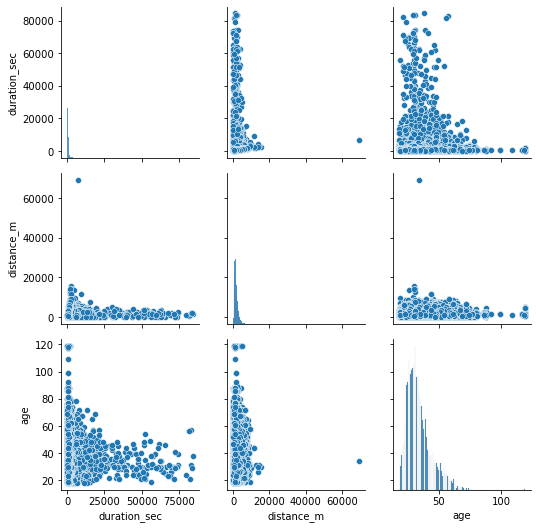

In [55]:
numeric_vars = ['duration_sec', 'distance_m', 'age']
categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip']

mtx = sns.PairGrid(data=bike_df_cleaned, vars=numeric_vars)
mtx.map_diag(sns.histplot)
mtx.map_offdiag(sns.scatterplot);

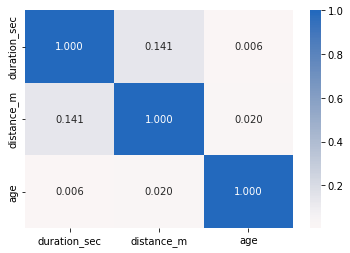

In [56]:
sns.heatmap(bike_df_cleaned[numeric_vars].corr(), annot=True, fmt = '.3f', cmap = 'vlag_r', center = 0);

In [57]:
print('Original duration_sec with outliers:\n', bike_df_cleaned.duration_sec.describe(), '\n')
print('Original distance_m with outliers:\n', bike_df_cleaned.distance_m.describe(), '\n')

Original duration_sec with outliers:
 count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64 

Original distance_m with outliers:
 count    174952.000000
mean       1690.051442
std        1096.958237
min           0.000000
25%         910.444462
50%        1429.831313
75%        2224.012981
max       69469.336637
Name: distance_m, dtype: float64 



In [58]:
# the relationship is not showing as there are extreme outliers in distance and duration as investigated earlier,
# let's impute them and check again.

def impute_outliers(df, col, method='median'):
    '''
    Impute outliers of numeric columns by the specifed method
    
        Parameters:
            df (dataframe): the dataframe that has the data
            col (string): string that represents the numeric column name that has outliers to be imputed
            method (string): string for the method to be used in the imputation
        Returns:
            None
    '''
    if method == 'mean':
        value = df[col].mean()
    elif method == 'median':
        value = df[col].median()     
    elif method == 'mode':
        value = df[col].mode()
    else:
        print('Couldn\'t impute {}. Please use on of these methods: mean, median, or mode'.format(col))
        return None
 
    iqr = df[col].quantile(.75) - df[col].quantile(.25)
    upper_fence = df[col].quantile(.75) + 1.5 * iqr
    lower_fence = df[col].quantile(.25) - 1.5 * iqr
    
    df[col] = np.where((df[col] < lower_fence) | (df[col] > upper_fence), value, df[col])
    
               
non_outliers_df = bike_df_cleaned.copy()

impute_outliers(non_outliers_df, 'duration_sec')
impute_outliers(non_outliers_df, 'distance_m')

In [59]:
print('Imputed duration_sec without outliers:\n', non_outliers_df.duration_sec.describe(), '\n')
print('Imputed distance_m without outliers:\n', non_outliers_df.distance_m.describe(), '\n')

Imputed duration_sec without outliers:
 count    174952.000000
mean        548.062166
std         296.202367
min          61.000000
25%         323.000000
50%         510.000000
75%         714.000000
max        1488.000000
Name: duration_sec, dtype: float64 

Imputed distance_m without outliers:
 count    174952.000000
mean       1579.729475
std         896.286101
min           0.000000
25%         910.444462
50%        1429.831313
75%        2093.603973
max        4194.142724
Name: distance_m, dtype: float64 



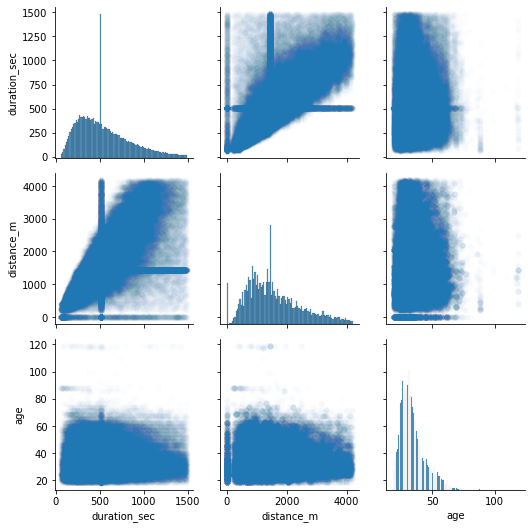

In [60]:
mtx = sns.PairGrid(data=non_outliers_df, vars=numeric_vars)
mtx.map_diag(sns.histplot)
mtx.map_offdiag(sns.scatterplot, alpha=0.01);

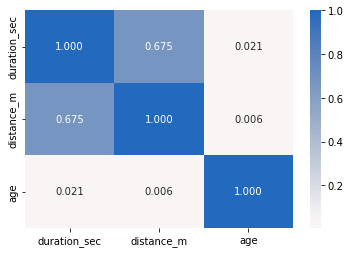

In [61]:
sns.heatmap(non_outliers_df[numeric_vars].corr(), annot=True, fmt = '.3f', cmap = 'vlag_r', center = 0);

### Observations
> It seemed that there weren't any clear relationship between our numeric variables when there was existing outliers in the data. However, after imputing outliers, now it's clear that there is a positive linear relationship between duration and distance with correlation of 0.675<br>
And the other numeric variable (age) doesn't seem to have any linear realtioship with any of the two features.<br><br>
Now let's see how is their relationship when compared against different categorical variables.

### Question: How is duration, distance, and age distributed across the different categorical variables?

<Figure size 1440x1440 with 0 Axes>

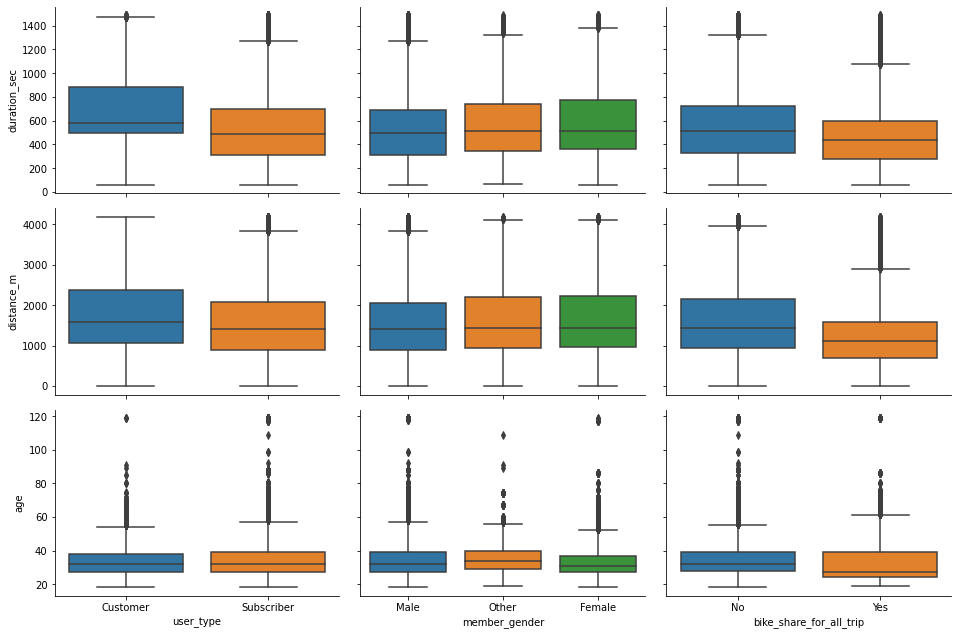

In [62]:
plt.figure(figsize = [20, 20])
g = sns.PairGrid(data = non_outliers_df, y_vars = numeric_vars, x_vars = categoric_vars, height = 3, aspect = 1.5)
g.map(sns.boxplot);

### Observations
> The relationship between trip duration and distance is as expected, when one increases so does the other even when compared for all categories.<br>
Duration seems to be affected by the different categories where user_type and bike_share show clear distinction in ranges for each class on the oppostie of gender where the classes are almost the same. This is also true for the distance travelled.<br>
Customers and users with no bike share service have higher median trip durations and distance traveled. Also, females users have the same behaviour where they are higher in median compared to males and "Other" category.<br>
As for the age, it seems almost constant across the different categories with median of about 35.<br>
Next, we will see how different days affect trip duration and distance.

### Question: How is the trend of trip duration_sec and distance_m over time for the different categories ?

In [63]:
# to check how many observations have different start and end date
bike_df_cleaned.day_diff.value_counts()

0 days    174669
1 days       283
Name: day_diff, dtype: int64

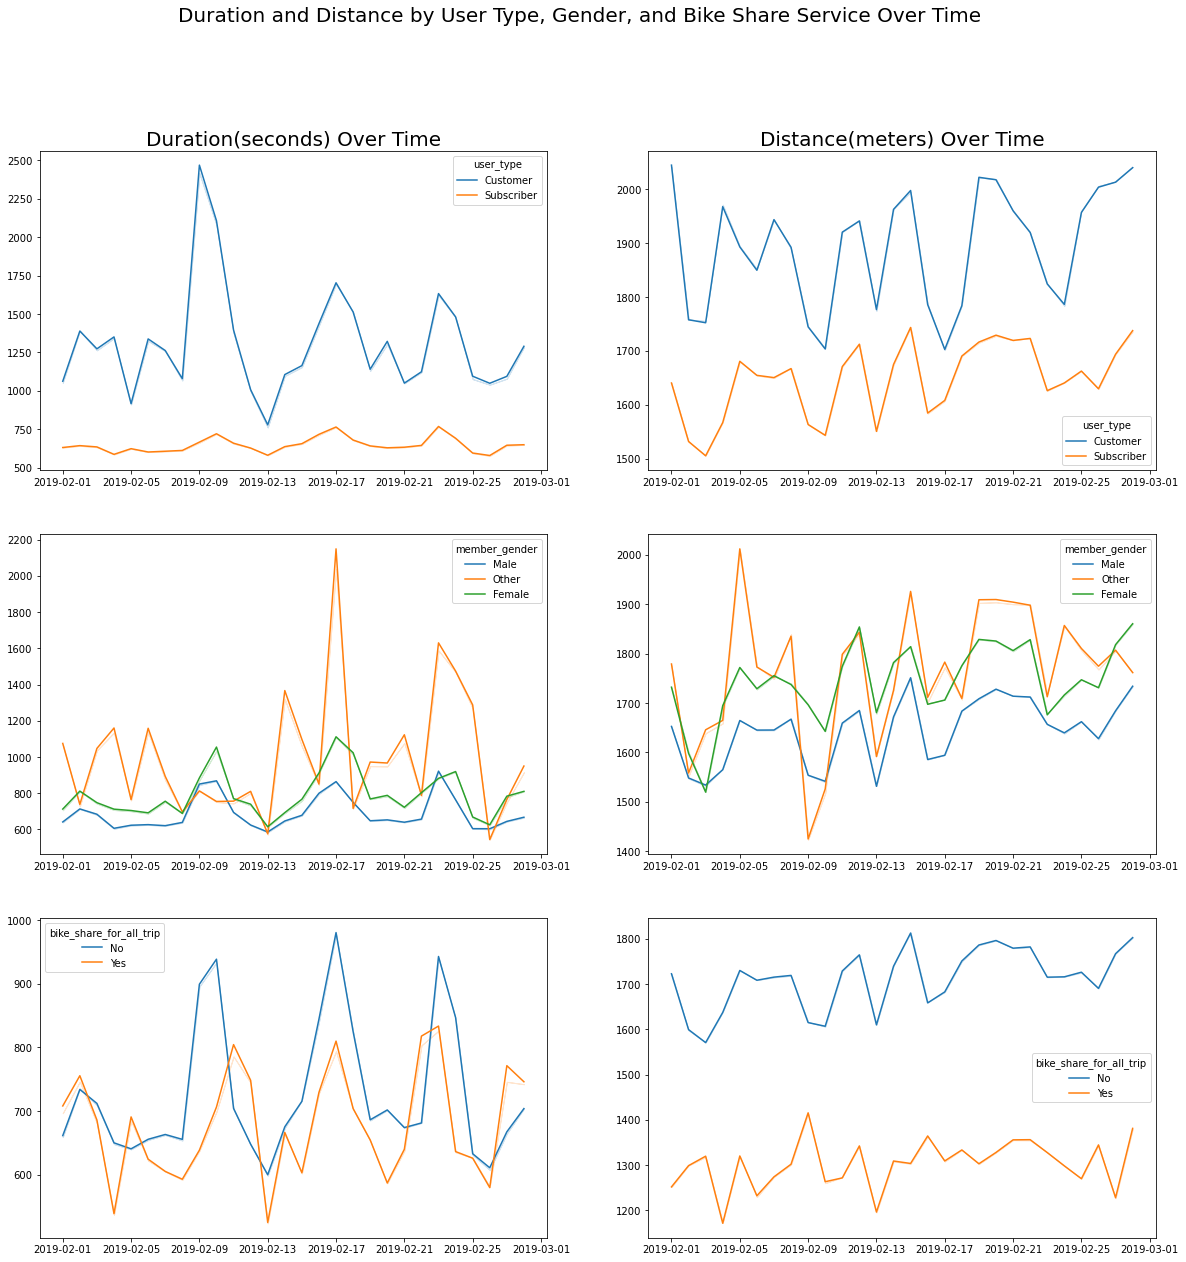

In [64]:
# Since only 283 out of 174,669 of observations have 1 day difference, while others 0 days difference,
# that means for almost all observations start date and end date of the trip is the same, and hence,
# we will be plotting against start date.


# plot the categorical variables against price and carat again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 2, nrows = 3 , figsize = [20,20])

plt.suptitle('Duration and Distance by User Type, Gender, and Bike Share Service Over Time', fontsize=20)
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sns.lineplot(data = bike_df_cleaned, x = 'start_date', y = 'duration_sec', ax = ax[i,0], hue=var, ci=0)
    ax[i,0].set(xlabel=None)
    ax[i,0].set(ylabel=None)
    sns.lineplot(data = bike_df_cleaned, x = 'start_date', y = 'distance_m', ax = ax[i,1], hue=var, ci=0)
    ax[i,1].set(xlabel=None)
    ax[i,1].set(ylabel=None)

ax[0,0].set_title('Duration(seconds) Over Time', fontsize=20)
ax[0,1].set_title('Distance(meters) Over Time', fontsize=20);

### Observations
> We can see that Duration by User Type has a spike on Feb.9 for customers with average duration of 2500 seconds while subscriber appears constant over time with average between 500 and 750. If we look at the distance, we see a strange behaviour on the day a spike for duration occurred for customers (Feb.9), there is actually a downtrend of travelled distance. Which suggests that users stopped traviling for some reason while keeping the bike with them. Also, the trend for subscribers users in travlled distance is an uptrend while thier duration was constant. This suggests that they increased speed overtime.<br><br>
From the Duration by Gender plot, the trend is usually Other category is higher on average second. However, female users have exceeded Other category on Feb.9, same day the customers type users had spike on. We also see a high steep of Other category in terms of distance travelled on Feb.9. But in generall, Other category have travlled more on average.<br><br>
For Duration by Users with Bike Share Service, we can notice a pattern of spikes on Feb.10, Feb.17, Feb.23 for both users that have the service and the users who don't. These spikes occurr with about 6 days difference. However, there doesn't seem to be any spikes for the distance travelled.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Looking at the ditribution of different categorical variables against duration and distance showed that only user type and bike_share factors have the greatest impact on the trip duration and distance.

### Were there any interesting or surprising interactions between features?

> When plotting the data over time for the different categories, the time factor had an impact on features behaviour where some showed some spikes on different days such as user type and gender while other showed a pattern such as bike_share. Also, it seems that subscribers user type remained constant in terms of trip duration of about 600-750 seconds over time but showed an increasing trend in terms of distance travelled.

<a id="store"></a>
## Storing

In [65]:
if not os.path.exists('cleaned_201902-fordgobike-tripdata.csv'): 
    bike_df_cleaned.to_csv('cleaned_201902-fordgobike-tripdata.csv', index=False) 

<a id="concl"></a>
## Conclusions
>During exploration, I have found that there are extreme values in both features of interest (duration and distance) initially from the histogram and then the boxplot which confirmed that. Since these outliers greatly skewed the data, I have used log-scaling on both to have a clear view of the distribution and they showed a normal distribution. It turned out that the most frequent duration is between 300 and 1,000 seconds with most frequent distance between 1,000 and 3,000 meters.<br><br>
After that, I have investigated the other features and found that male users who are subscribers and don’t go with the bike share service constitute the majority of observations. What's more, customer user type have on average higher trip duration and distance than subscribers. I also looked at the age of users and found that most users are between 24 and 34.<br><br>
Lastly, I examined the relationship of the numeric variables which are duration, distance, and age. Duration and distance and had to impute outliers in order to extract the relationship. They have a positive linear relationship with each other with correlation of 0.675 and no linear relationship at all with age. In addition, I noticed that time can play as a factor in determining the duration and distance for some categories such as user type and bike share as it introduces some spikes and pattern for the duration and distance features.

